In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [44]:
df = pd.read_csv('dados_produtos.csv')
produto = df['product_name']
nota = df['rating']


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [49]:
df.describe()

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [47]:
df.head()

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1



-------------------- Árvore de Decisão do Produto  Televisão --------------------

Avaliação do Modelo: 

Accuracy Score: 0.6666666666666666
F1 Score: 0.75
Precision Score: 0.75
Recall Score: 0.75
Confusion Matrix: [[1 1]
 [1 3]]

Visualização da Árvore:


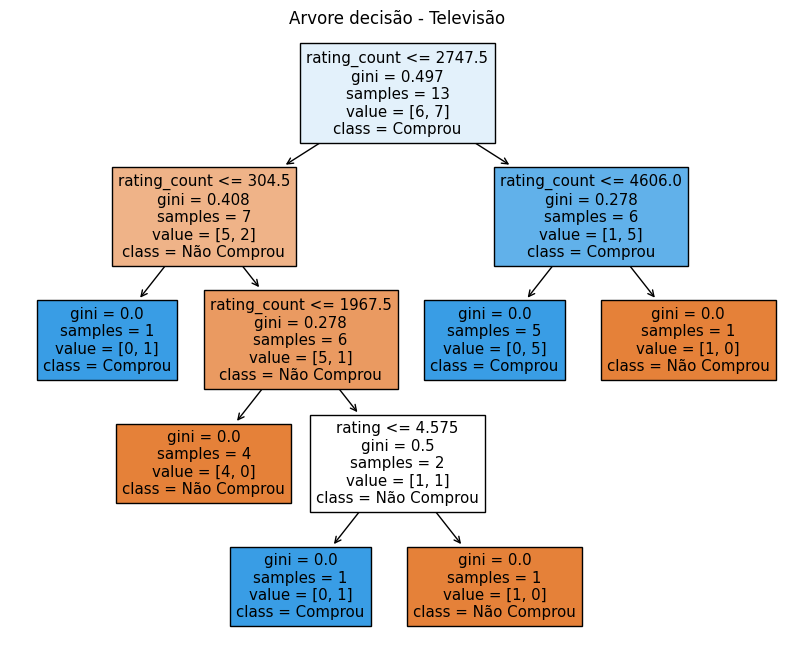


-------------------- Árvore de Decisão do Produto  Celular --------------------

Avaliação do Modelo: 

Accuracy Score: 0.2857142857142857
F1 Score: 0.4444444444444444
Precision Score: 0.3333333333333333
Recall Score: 0.6666666666666666
Confusion Matrix: [[0 4]
 [1 2]]

Visualização da Árvore:


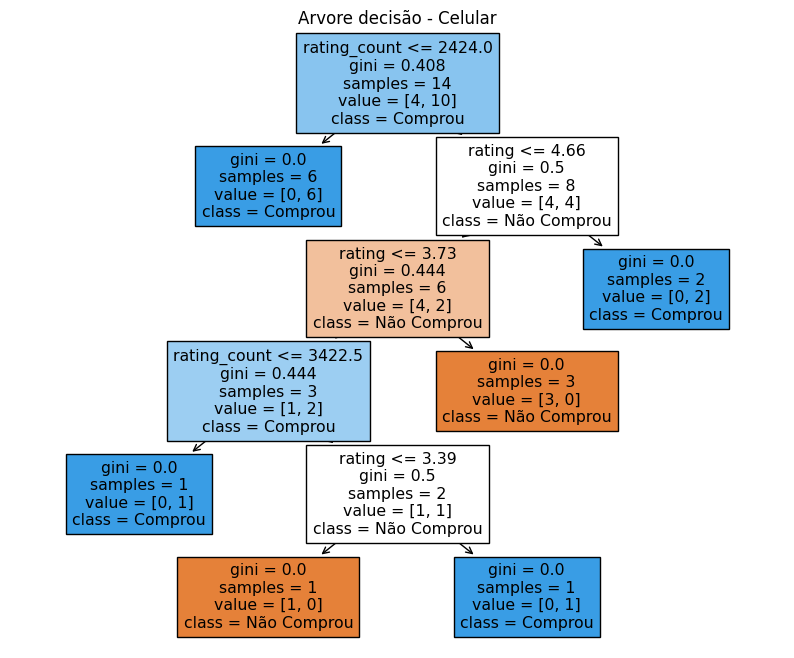


-------------------- Árvore de Decisão do Produto  Cafeteira --------------------

Avaliação do Modelo: 

Accuracy Score: 0.3333333333333333
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[1 1]
 [1 0]]

Visualização da Árvore:


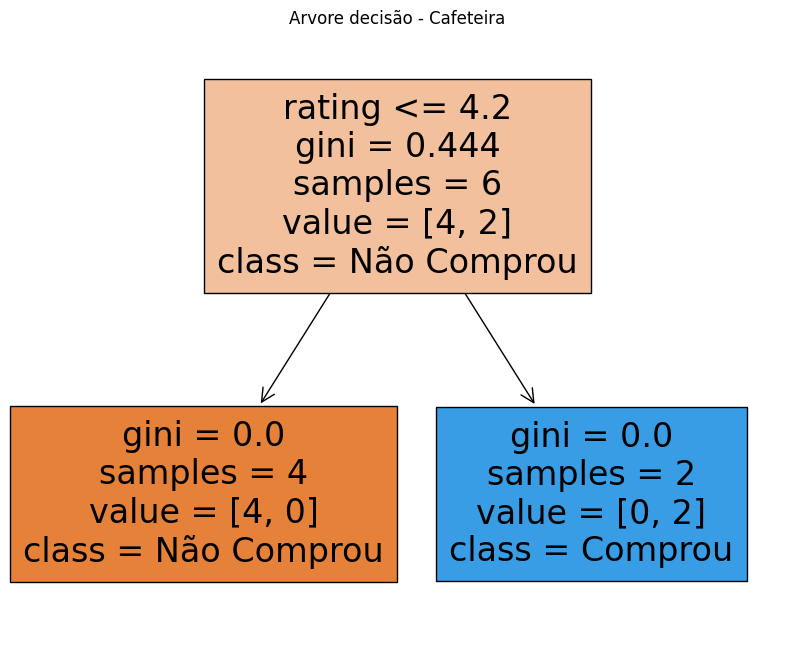


-------------------- Árvore de Decisão do Produto  Videogame --------------------

Avaliação do Modelo: 

Accuracy Score: 0.6666666666666666
F1 Score: 0.8
Precision Score: 0.6666666666666666
Recall Score: 1.0
Confusion Matrix: [[0 2]
 [0 4]]

Visualização da Árvore:


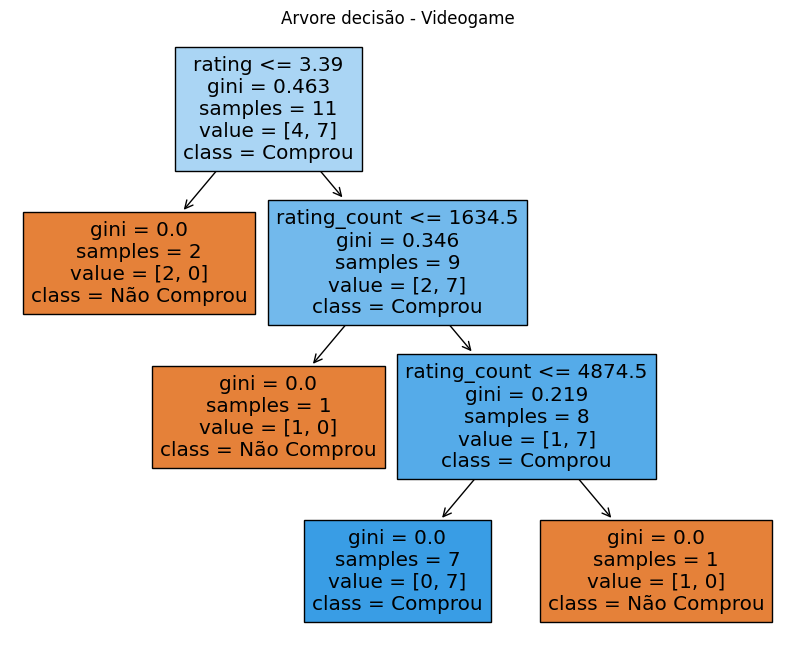


-------------------- Árvore de Decisão do Produto  iPod --------------------

Avaliação do Modelo: 

Accuracy Score: 0.16666666666666666
F1 Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
Confusion Matrix: [[1 1]
 [4 0]]

Visualização da Árvore:


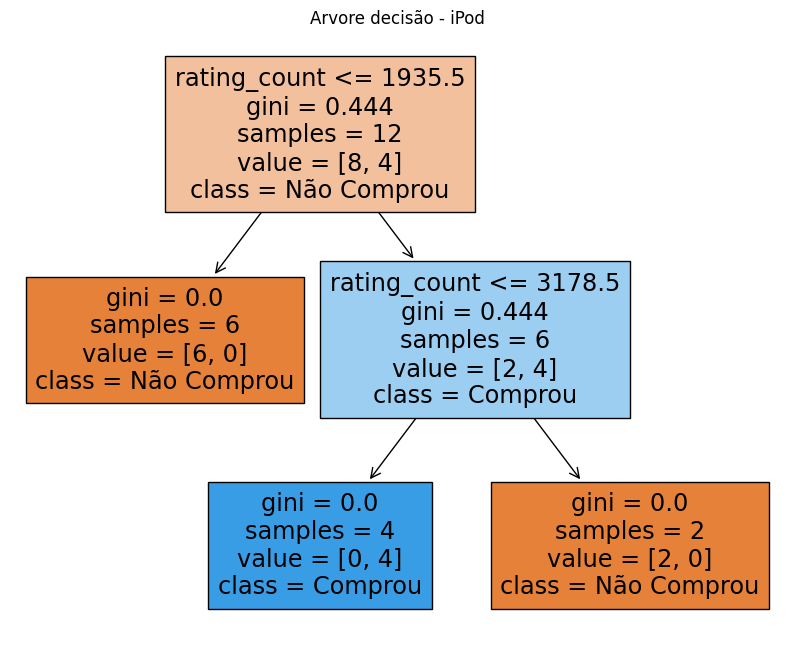


-------------------- Árvore de Decisão do Produto  Notebook --------------------

Avaliação do Modelo: 

Accuracy Score: 0.6
F1 Score: 0.5
Precision Score: 0.3333333333333333
Recall Score: 1.0
Confusion Matrix: [[2 2]
 [0 1]]

Visualização da Árvore:


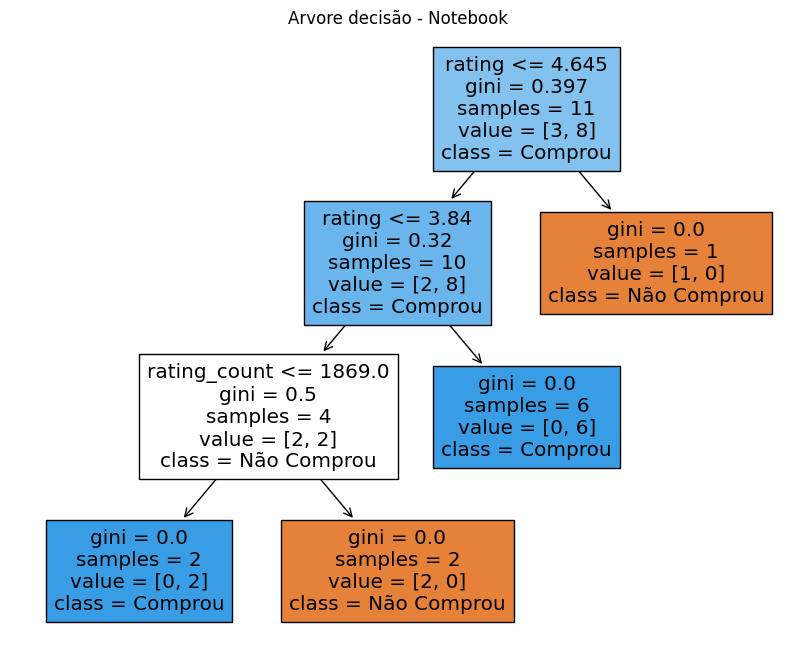

In [48]:
products = df['product_name'].unique()
 
for product in products:
    print(f'\n-------------------- Árvore de Decisão do Produto  {product} --------------------\n')
 
    product_df = df.loc[df['product_name'] == product]
 
    X = product_df.drop(['purchased', 'product_name'], axis=1)
    y = product_df['purchased']
 
    X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    dtc = DecisionTreeClassifier()
    model = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_teste)
 
    print('Avaliação do Modelo: \n')
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred)}')
    print(f'Recall Score: {recall_score(y_test, y_pred)}')
    print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred)}')
 
    print('\nVisualização da Árvore:')
   
    # Mapeando as classes
    product_df.loc[:, 'purchased'] = product_df['purchased'].replace([1, 0], ['Comprou', 'Não Comprou'])
 
    fig = plt.figure(figsize=(10, 8))
 
    # Usando os nomes corretos para features e classes
    plot_tree(model, feature_names=X.columns.tolist(), class_names=['Não Comprou', 'Comprou'], filled=True)
    plt.title(f'Arvore decisão - {product}')
    plt.show()

In [ ]:
# exe9.  Os modelos de árvore de decisão podem ser eficientes para antecipar aquisições de consumidores com base em avaliações,
#  já que são de fácil compreensão e conseguem identificar interações entre variáveis como a média de notas e o número de avaliações.
#  Contudo, apresentam restrições, como a propensão ao overfitting (ajuste excessivo aos dados de treinamento) e,
#  em determinadas situações, desempenho inferior a outros modelos mais sofisticados, como florestas aleatórias ou modelos baseados em gradiente.